<a href="https://www.kaggle.com/code/siddp6/mnist-neural-network-from-scratch?scriptVersionId=176693222" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import numpy as np

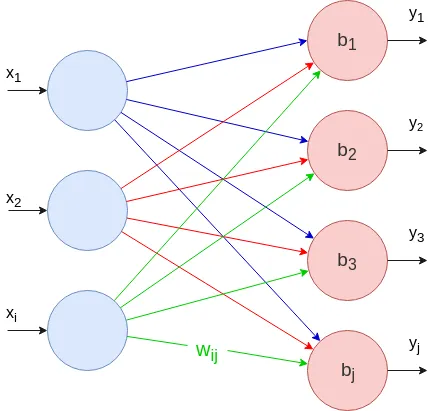



## Forward Pass Equation

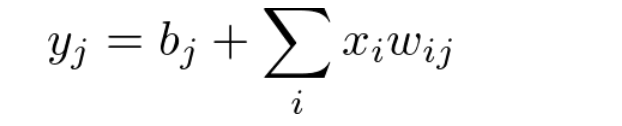

- y_j: Output of the neuron j
- b_j: Bias associated with neuron j
- x_i: Input feature i
- w_{i,j}: Weight associated with the connection between input i and neuron j

This equation computes the output of a neuron as a weighted sum of the inputs plus the bias.



## 2. Backpropagation Equations

   The following equations represent the gradients needed to update the weights and biases in a neural network during backpropagation.
   
### Gradient of Error with respect to Inputs
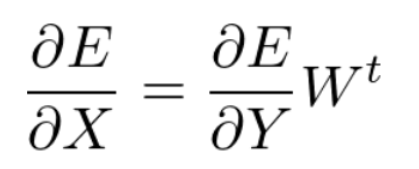
  
- E: Loss or error
- X: Input features
- Y: Output of the layer
- W^t: Transpose of the weight matrix W
      
__Why need this:__

In multilayer networks, the output of one layer becomes the input to the next. By computing the gradient of the error with respect to inputs, we can propagate the error backward through each layer. This allows the error signal to flow through each layer and inform the weight updates.
 
### Gradient of Error with respect to Weights
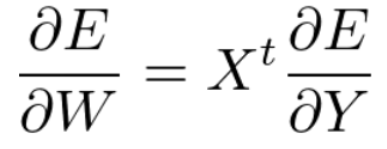

- E: Loss or error
- W: Weight matrix
- X^t: Transpose of the input matrix X
- Y: Output of the layer

__Why need this:__ 

Weights are the primary parameters that define the relationship between inputs and outputs in a neural network. By computing the gradient of the error with respect to the weights, we understand how changes in weights affect the overall error. Using this gradient and a learning rate, we can update the weights via gradient descent to get the minimum loss.
- If the gradient is positive, the weight should be reduced to decrease the error.
- If the gradient is negative, the weight should be increased to decrease the error.
 
 
### Gradient of Error with respect to Bias
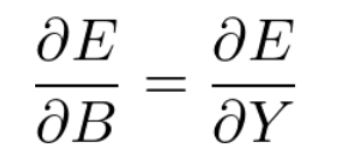

- B: Bias vector
- E: Loss or error
- Y: Output of the layer

__Why need this:__

ases are additional parameters that allow the model to adjust the output independently of the input values. They are crucial for enhancing the model's flexibility. Adjusting biases helps shift the activation function to better fit the data.

In [ ]:
class FullyConnectedLayer():
    def __init__(self, input_size, prediction_size):
        self.weights = np.random.rand(input_size, prediction_size) - 0.5
        self.bias = np.random.rand(1, prediction_size) - 0.5
    
    def forward(self, input):
        self.input = input
        self.prediction = np.dot(self.input, self.weights) + self.bias
        return self.prediction
    
    def backward(self, error_derivative, lr):
        input_error = np.dot(error_derivative, self.weights.T)
        weights_error = np.dot(self.input.T, error_derivative)
        bias_error = error_derivative
        
        self.weights -= lr * weights_error
        self.bias -= lr * bias_error 
        
        return input_error # this will be the prediction error for previous layer

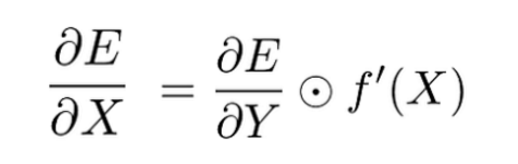

In [ ]:
class ActivationLayer():
    def __init__(self, activation, activation_derivation):
        self.activation = activation
        self.activation_derivation = activation_derivation
    
    def forward(self, input):
        self.input = input
        self.prediction = self.activation(self.input)
        return self.prediction
    
    def backward(self, error_derivative, lr):
        return self.activation_derivation(self.input) * error_derivative

In [ ]:
def tanh(x): return np.tanh(x)
def tanh_derivation(x): return 1-np.tanh(x)**2

In [ ]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivation(x): return np.exp(-x) / (1 + np.exp(-x))**2

In [ ]:
def mse(y_true, y_pred): return np.mean(np.power(y_true-y_pred, 2))
def mse_dervivation(y_true, y_pred):   return 2*(y_pred-y_true)/y_true.size

In [ ]:
class Network:
    def __init__(self):
        self.layers = list()
        self.loss = None
        self.loss_derivation = None
    
    def add(self, layer):
        self.layers.append(layer)
        
    def set_loss(self, loss, loss_derivation):
        self.loss = loss
        self.loss_derivation = loss_derivation
    
    def predict(self, inputs):
        results = list()
        
        for idx in range(len(inputs)):
            prediction = inputs[idx]
            for layer in self.layers:
                prediction = layer.forward(prediction)
            results.append(prediction)
        return results
    
    def fit(self, inputs, predictions, epochs, lr):
        for epoch in range(epochs):
            cur_epoch_error = 0
            for idx in range(len(inputs)):
                prediction = inputs[idx]
                for layer in self.layers:
                    prediction = layer.forward(prediction)

                cur_epoch_error += self.loss(predictions[idx], prediction)
                error_derivation = self.loss_derivation(predictions[idx], prediction)
                
                for layer in reversed(self.layers):
                    error_derivation = layer.backward(error_derivation, lr)   

            cur_err = cur_epoch_error / len(inputs)
            print('epoch %d/%d   error=%f' % (epoch+1, epochs, cur_epoch_error))

# XOR

In [ ]:
# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# network
net = Network()
net.add(FullyConnectedLayer(2, 3))
net.add(ActivationLayer(tanh, tanh_derivation))
net.add(FullyConnectedLayer(3, 1))
net.add(ActivationLayer(tanh, tanh_derivation))

# train
net.set_loss(mse, mse_dervivation)
net.fit(x_train, y_train, epochs=10, lr=0.1)

# test
out = net.predict(x_train)
print(out)

In [ ]:
print(x_train[0], y_train[0])

# MNIST

In [ ]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from torch.utils.data import random_split

In [ ]:
def transform_image(image):
    image = image.convert('L')
    image = image.resize((28, 28))
    image = list(image.getdata())
    image = np.array(image)
    image = image.reshape(1, -1)
    image = image / 255
    image.astype('float32')
    return image

def transform_label(label):
    new_label = [0] * 10
    new_label[label] = 1
    new_label = np.array(new_label)
    new_label.astype('float32')
    new_label = new_label.reshape(1, -1)
    return new_label

In [ ]:
dataset = MNIST("/data", download=True, train=True)
train_ds, _ = random_split(dataset, [5000, 55000])


image, label = train_ds[10]
plt.imshow(image)

train_images, train_labels = list(), list()
for image, label in train_ds:
    train_images.append(transform_image(image))
    train_labels.append(transform_label(label))

In [ ]:
# network
net = Network()
net.add(FullyConnectedLayer(28*28, 256))
net.add(ActivationLayer(sigmoid, sigmoid_derivation))
net.add(FullyConnectedLayer(256, 128))
net.add(ActivationLayer(sigmoid, sigmoid_derivation))
net.add(FullyConnectedLayer(128, 10))
net.add(ActivationLayer(sigmoid, sigmoid_derivation))


# train
net.set_loss(mse, mse_dervivation)
net.fit(train_images, train_labels, epochs=100, lr=0.1)

In [ ]:
# test
test_image, test_label = dataset[21201]
out = net.predict(transform_image(test_image))

max_index = np.argmax(out)
max_value = np.max(out)

print("Predicted label value: ", max_index)
print("Prob value: ", max_value)
print("Actaul Label:", test_label)